# **Homework**

# **Stroke Prediction**

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [212]:
from google.colab import files
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

In [213]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [214]:
type(stroke_data)    # print the type of dataframe

pandas.core.frame.DataFrame

In [215]:
stroke_data.head()  # print the first 5 rows for inspection

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [216]:
stroke_data.tail()  # print the last 5 rows for inspection

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [217]:
stroke_data.shape     # print the number of rows and columns

(5110, 12)

In [218]:
stroke_data.info()   # print the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [219]:
stroke_data.describe()     # print the statistical summary of all numerical attributes

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [220]:
stroke_data.isnull().sum()    # checking the missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [221]:
stroke_data = stroke_data.dropna()    # drop the null values in the dataset

In [222]:
stroke_data.isnull().sum()         # checking the missing values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [223]:
stroke_data.head()    # print the first 5 rows for inspection

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [224]:
stroke_data['gender'].value_counts()    # returns count values in a particular column gender

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [225]:
stroke_data['ever_married'].value_counts()         # returns count values in a particular column ever_married

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [226]:
stroke_data['work_type'].value_counts()      # returns count values in a particular column work_type

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [227]:
stroke_data['Residence_type'].value_counts()   # returns count values in a particular column Residence_type


Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [228]:
stroke_data['smoking_status'].value_counts()    # returns count values in a particular column smoking_status

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [229]:
# Label Encoding
stroke_data.replace({"gender": {'Female': 0, 'Male': 1, 'Other' : 2}, "ever_married": {'Yes': 0, 'No': 1}, "work_type": {'Private': 0, 'Self-employed': 1, 
                                      'children': 2, 'Govt_job': 3, 'Never_worked': 4}, "Residence_type": {'Urban': 0, 'Rural': 1}, 
                                      "smoking_status": {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [230]:
stroke_data.head()     # print the first 5 rows for inspection

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,2,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,0,1
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,0,1
5,56669,1,81.0,0,0,0,0,0,186.21,29.0,2,1


In [231]:
# seperating the data and labels
X = stroke_data.drop(columns = ['stroke'], axis = 1)
Y = stroke_data['stroke']

In [232]:
print(X)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             0   
2     31112       1  80.0             0              1             0   
3     60182       0  49.0             0              0             0   
4      1665       0  79.0             1              0             0   
5     56669       1  81.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
5104  14180       0  13.0             0              0             1   
5106  44873       0  81.0             0              0             0   
5107  19723       0  35.0             0              0             0   
5108  37544       1  51.0             0              0             0   
5109  44679       0  44.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0             0               0             228.69  36.6    

In [233]:
print(Y)

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64


**DATA VISUALIZATION**

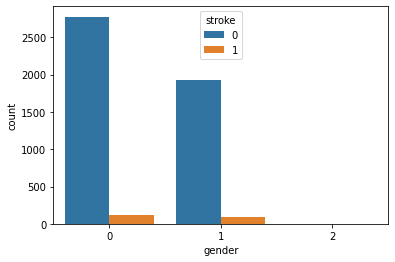

In [234]:
# gender and stroke
sns.countplot(x = 'gender', hue = 'stroke', data = stroke_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


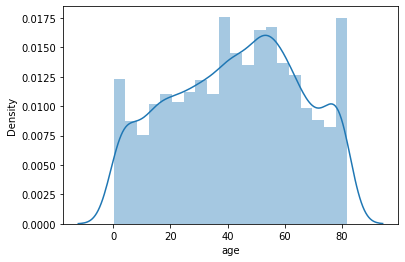

In [235]:
# age
sns.distplot(stroke_data['age'])

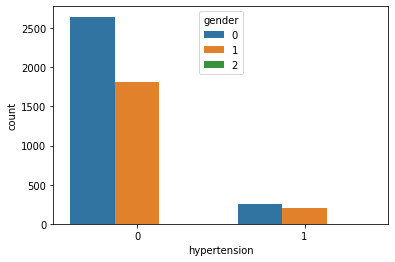

In [236]:
# hypertension and stroke
sns.countplot(x = 'hypertension', hue = 'gender', data = stroke_data)

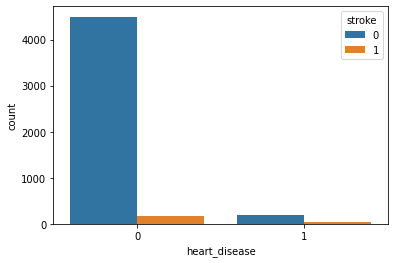

In [237]:
# heart disease and stroke
sns.countplot(x = 'heart_disease', hue = 'stroke', data = stroke_data)

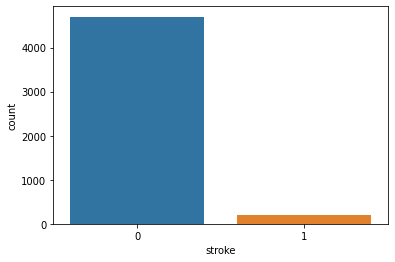

In [238]:
sns.countplot(x = 'stroke', data = stroke_data)

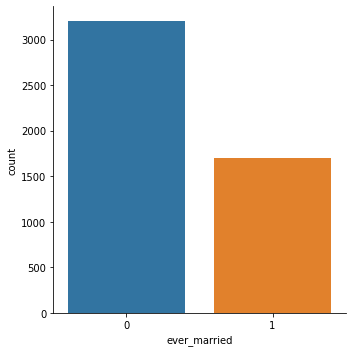

In [239]:
sns.catplot(x = 'ever_married', data = stroke_data, kind = 'count')

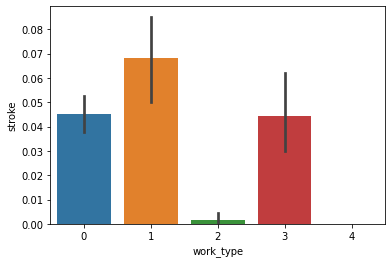

In [240]:
sns.barplot(x = 'work_type', y = 'stroke', data = stroke_data)

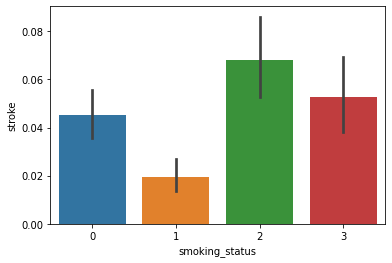

In [241]:
sns.barplot(x = 'smoking_status', y = 'stroke', data = stroke_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


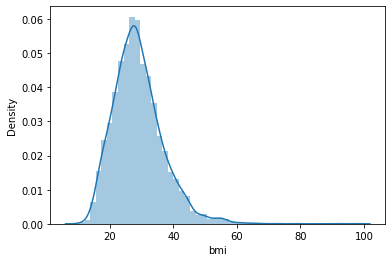

In [242]:
sns.distplot(stroke_data['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


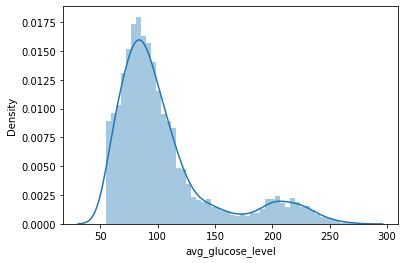

In [243]:
sns.distplot(stroke_data['avg_glucose_level'])

In [244]:
#Train and Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [245]:
print(X.shape, X_train.shape, X_test.shape)

(4909, 11) (4418, 11) (491, 11)


In [246]:
print(X_train)

         id  gender   age  hypertension  heart_disease  ever_married  \
2128  56420       1  17.0             1              0             1   
2180  57270       0  57.0             0              0             0   
3479   3167       1  53.0             0              1             0   
4288  47886       0  43.0             1              0             0   
521   17242       1  67.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
4430  60964       0  71.0             1              0             0   
1460  13736       1  24.0             0              0             0   
3286   3984       0  33.0             0              0             0   
1092  67603       1  70.0             0              0             0   
3981  69404       1  73.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
2128          0               1              61.67  97.6    

In [247]:
print(Y_train)

2128    0
2180    0
3479    0
4288    0
521     0
       ..
4430    0
1460    0
3286    0
1092    0
3981    0
Name: stroke, Length: 4418, dtype: int64


**MODEL TRAINING**

In [248]:
classifier = svm.SVC(kernel = 'linear')

In [249]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**MODEL EVALUATION**

In [250]:
# accuracy on training data
training_data_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction, Y_train)

In [251]:
print('Accuracy of training data: ', training_data_accuracy)

Accuracy of training data:  0.9520144861928475


In [252]:
# accuracy of testing data
testing_data_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(testing_data_prediction, Y_test)

In [253]:
print(' Accuracy of testing data: ', testing_data_accuracy)

 Accuracy of testing data:  0.9490835030549898
